In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist

### Creacion y Anaisis de Datos

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
data=np.array(list(zip(x1,x2))).reshape(len(x1),2) #reshape(#filas,#columnas)

Text(0,0.5,'y')

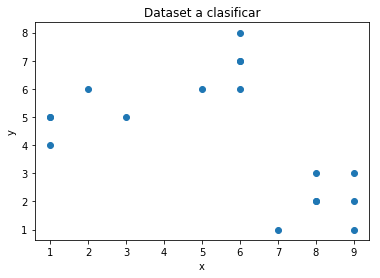

In [3]:
plt.scatter(x1,x2)
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")

### Obtencion del numero optimo de clusters

* Para el numero de clusters =  2  el promedio de las siluetas es de : 0.6113424368705715
   - Para el Cluster  1  su silueta vale :  0.49704450958269375
   - Para el Cluster  2  su silueta vale :  0.7746251901389686


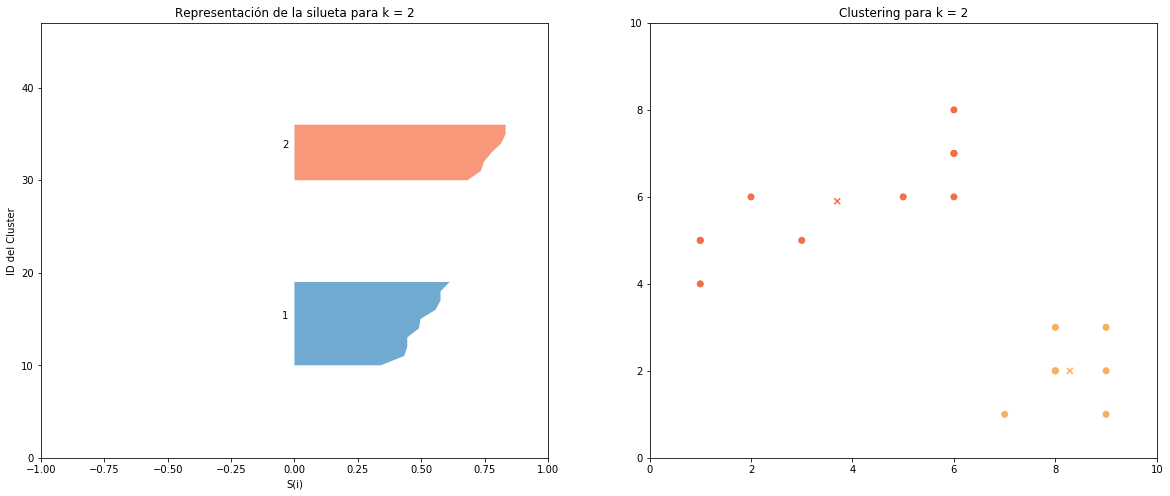

* Para el numero de clusters =  3  el promedio de las siluetas es de : 0.7122079383287169
   - Para el Cluster  1  su silueta vale :  0.7345257364682265
   - Para el Cluster  2  su silueta vale :  0.6609508863896014
   - Para el Cluster  3  su silueta vale :  0.7322200728725188


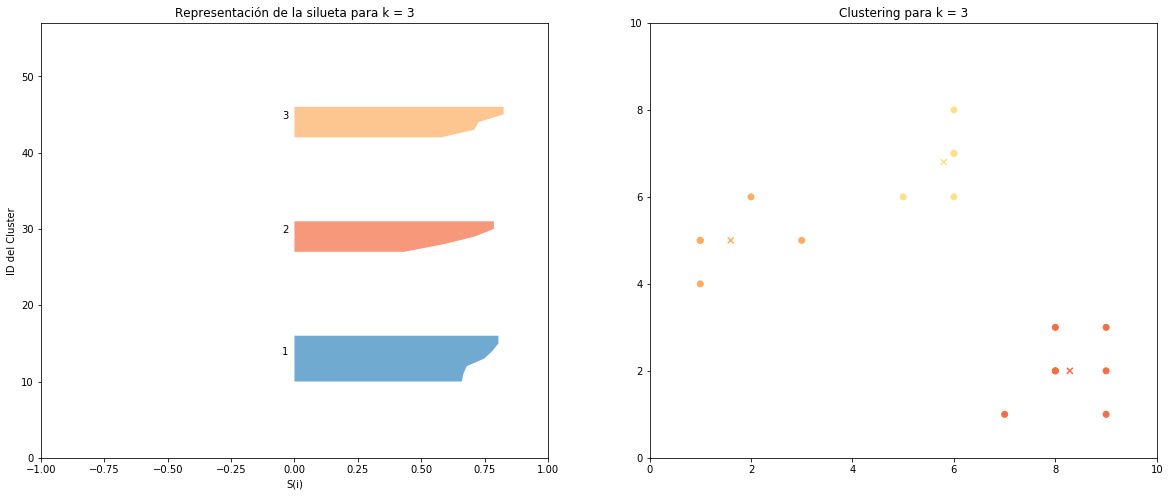

* Para el numero de clusters =  4  el promedio de las siluetas es de : 0.6389948643127632
   - Para el Cluster  1  su silueta vale :  0.24096929517637128
   - Para el Cluster  2  su silueta vale :  0.7345257364682265
   - Para el Cluster  3  su silueta vale :  0.654458796162702
   - Para el Cluster  4  su silueta vale :  0.655666655624379


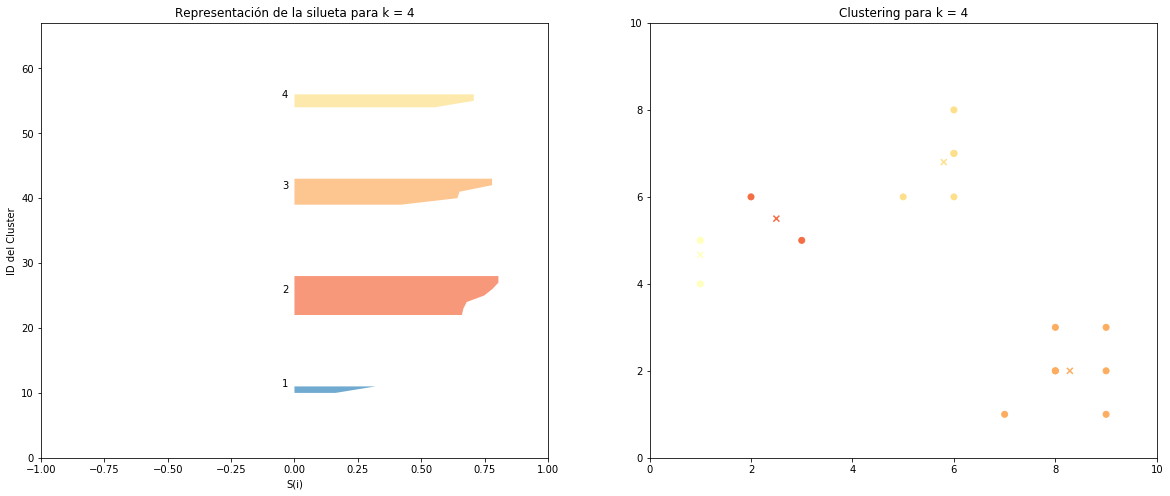

* Para el numero de clusters =  5  el promedio de las siluetas es de : 0.42883912423017356
   - Para el Cluster  1  su silueta vale :  0.1899052168375926
   - Para el Cluster  2  su silueta vale :  0.24096929517637128
   - Para el Cluster  3  su silueta vale :  0.654458796162702
   - Para el Cluster  4  su silueta vale :  0.2698039021743969
   - Para el Cluster  5  su silueta vale :  0.655666655624379


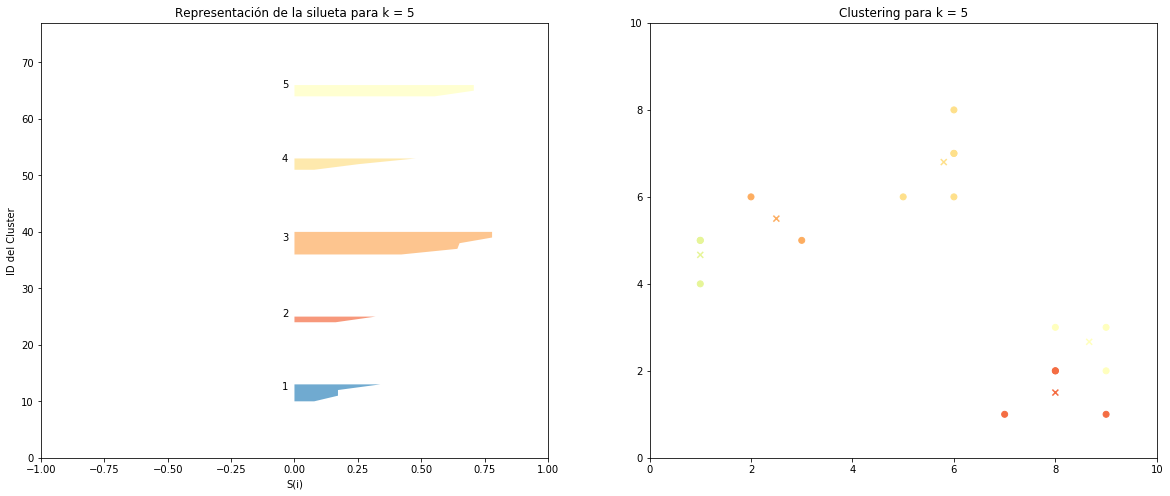

* Para el numero de clusters =  6  el promedio de las siluetas es de : 0.4421681922609326
   - Para el Cluster  1  su silueta vale :  0.654458796162702
   - Para el Cluster  2  su silueta vale :  0.263812295212263
   - Para el Cluster  3  su silueta vale :  0.655666655624379
   - Para el Cluster  4  su silueta vale :  0.24096929517637128
   - Para el Cluster  5  su silueta vale :  0.0
   - Para el Cluster  6  su silueta vale :  0.31700053499298475


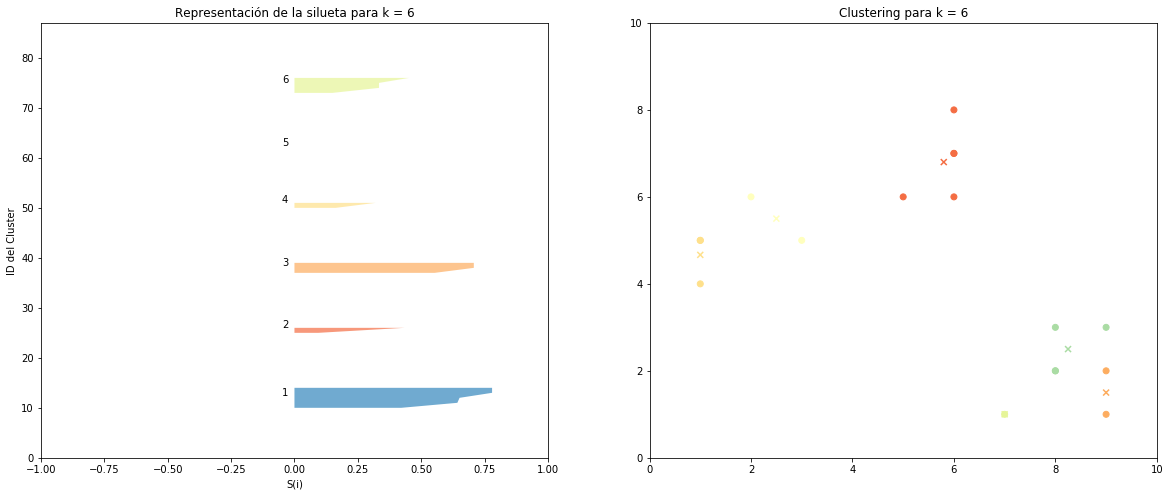

* Para el numero de clusters =  7  el promedio de las siluetas es de : 0.3800485694524957
   - Para el Cluster  1  su silueta vale :  0.027847735322324364
   - Para el Cluster  2  su silueta vale :  0.24096929517637128
   - Para el Cluster  3  su silueta vale :  0.32882042637679976
   - Para el Cluster  4  su silueta vale :  0.655666655624379
   - Para el Cluster  5  su silueta vale :  0.5664789734180768
   - Para el Cluster  6  su silueta vale :  0.0
   - Para el Cluster  7  su silueta vale :  0.5237553814972481


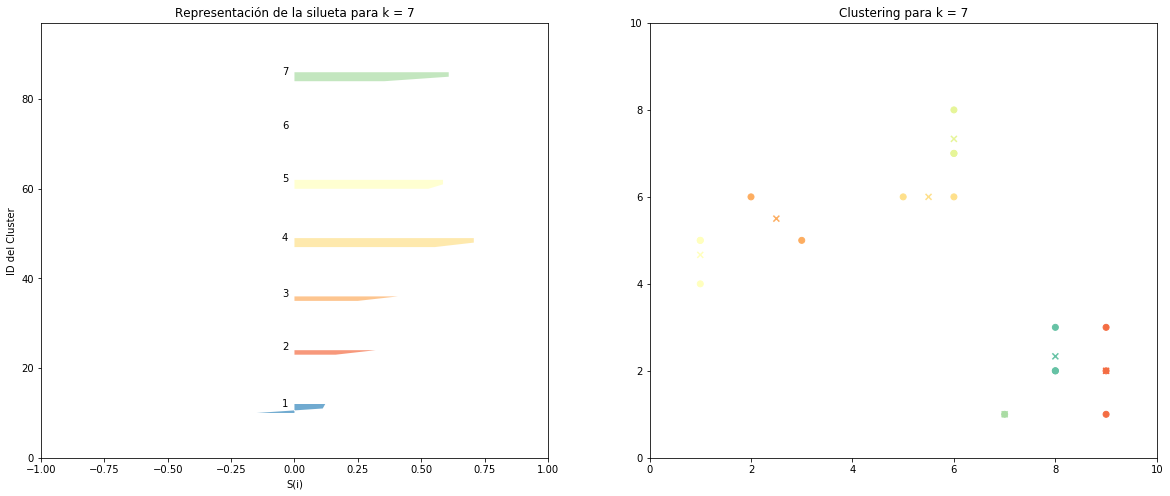

* Para el numero de clusters =  8  el promedio de las siluetas es de : 0.37148811318564345
   - Para el Cluster  1  su silueta vale :  0.0
   - Para el Cluster  2  su silueta vale :  0.5664789734180768
   - Para el Cluster  3  su silueta vale :  0.24096929517637128
   - Para el Cluster  4  su silueta vale :  0.16885435933420914
   - Para el Cluster  5  su silueta vale :  0.655666655624379
   - Para el Cluster  6  su silueta vale :  0.32882042637679976
   - Para el Cluster  7  su silueta vale :  0.39052429175126996
   - Para el Cluster  8  su silueta vale :  0.0


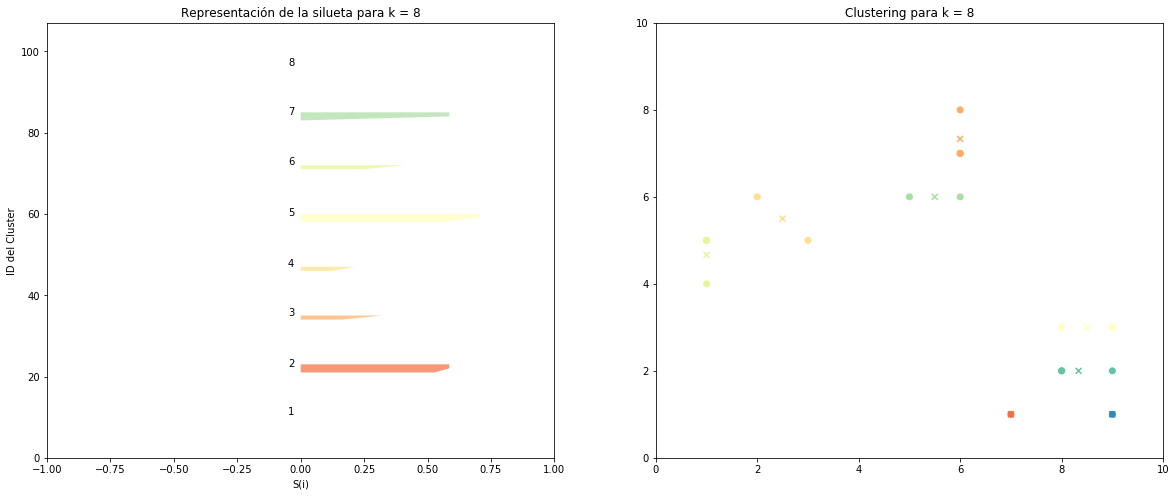

IndexError: list index out of range

In [4]:
max_clust=10
clusters=range(2,max_clust)#importante crear mas de 2 clusters para el metodo de silueta y codo
ssw=[] #suma de los cuadrados internos
color_palette=[plt.cm.Spectral(float(k)/max_clust) for k in clusters]

centroide=[sum(data)/len(data) for k in clusters]
sst=sum(np.min(cdist(data,centroide,'euclidean'),axis=1))#suma de los cuadrados totales

for k in clusters:
    kmean_model=KMeans(n_clusters=k).fit(data)
    
    centers=pd.DataFrame(kmean_model.cluster_centers_)
    labels=kmean_model.labels_
    
    ssw_k=sum(np.min(cdist(data,kmean_model.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
    
    label_color=[color_palette[l] for l in labels]
    
    if 1<k<len(data): #Por seguridad no se crean siluetas con clusters menores a 2 y mayores a len(data)
        
        fig,(axis1,axis2)=plt.subplots(1,2)

        fig.set_size_inches(20,8)

        axis1.set_xlim([-1,1])  #subplot que contendra la silueta
        
        axis1.set_ylim([0,len(data)+(k+1)*10]) #len(data)+(clusters+1)*10] representa el espacio en blanco entre siluetas
        
        silhouette_avg = silhouette_score(data, labels)
        print("* Para el numero de clusters = ",k, " el promedio de las siluetas es de :",silhouette_avg)
        
        sample_silhouette_values = silhouette_samples(data, labels)#valores de cada silueta
    
        y_lower = max_clust
        
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para el Cluster ", i+1, " su silueta vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i-1]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette, marker = "x")
    plt.show()